Optimal Parameters: [2.4276865676482444, 17.40900606319868, 0.9557371223525565, 0.6013746035121936, 0.9265771316127366]
Minimum Cost: 1.8878406665779195


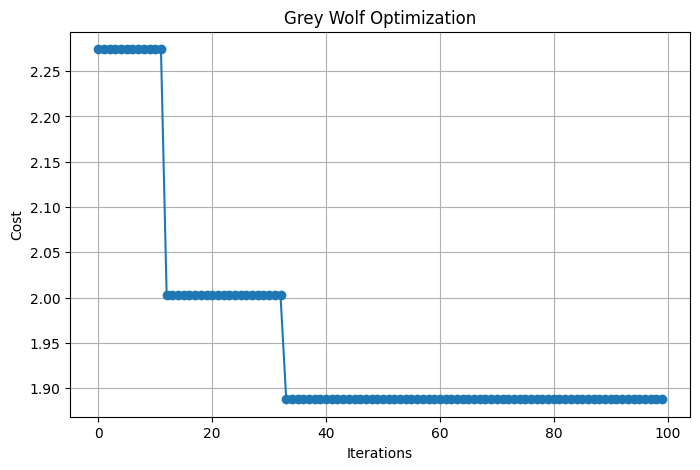

In [10]:
import random
import math
import matplotlib.pyplot as plt

# Define the complex cost function
def modified_cost_function(D, F, Q, SM, WD):
    # Coefficients
    a1 = 0.5  # Weight for irrigation duration
    a2 = 0.3  # Weight for irrigation frequency
    a3 = 0.2  # Weight for flow rate
    a4 = 0.4  # Weight for soil moisture
    a5 = 0.6  # Weight for weather data

    # Define constraints
    min_duration = 2  # Minimum allowable irrigation duration (hours)
    max_duration = 8  # Maximum allowable irrigation duration (hours)
    min_frequency = 12  # Minimum allowable irrigation frequency (hours)
    max_frequency = 36  # Maximum allowable irrigation frequency (hours)
    max_flow_rate = 2.0  # Maximum allowable flow rate (L/s)

    # Calculate cost components
    # Change the term related to D to linear
    cost_duration = a1 * (D / max_duration)  # Penalize long durations
    cost_frequency = a2 * math.exp((F - min_frequency) / (max_frequency - min_frequency))  # Penalize low frequency
    cost_flow_rate = a3 * math.exp((Q - max_flow_rate) / max_flow_rate)  # Penalize high flow rate
    # Change the term related to SM to exponential
    cost_soil_moisture = a4 * math.exp(1 - SM)  # Penalize dry soil
    # Change the term related to WD to exponential
    cost_weather_data = a5 * math.exp(1 - WD)  # Penalize unfavorable weather

    # Calculate the total cost
    total_cost = cost_duration + cost_frequency + cost_flow_rate + cost_soil_moisture + cost_weather_data

    return total_cost

# Grey Wolf Optimization algorithm for optimization with plotting
def grey_wolf_optimization_with_plot(iterations, lower_bounds, upper_bounds):
    # Initialize the best solution and best cost
    best_solution = [random.uniform(lower, upper) for lower, upper in zip(lower_bounds, upper_bounds)]
    best_cost = modified_cost_function(*best_solution)

    # Lists to store optimization progress for plotting
    iteration_list = []
    cost_list = []

    for iteration in range(iterations):
        # Generate a random solution in the search space
        candidate_solution = [random.uniform(lower, upper) for lower, upper in zip(lower_bounds, upper_bounds)]
        candidate_cost = modified_cost_function(*candidate_solution)

        # Update the best solution if the candidate is better
        if candidate_cost < best_cost:
            best_solution = candidate_solution
            best_cost = candidate_cost

        # Store progress data for plotting
        iteration_list.append(iteration)
        cost_list.append(best_cost)

    return best_solution, best_cost, iteration_list, cost_list

# Define search space bounds for each parameter
lower_bounds = [2, 12, 0.1, 0, 0]  # Adjust these bounds as needed
upper_bounds = [8, 36, 2.0, 1, 1]  # Adjust these bounds as needed

# Run the Grey Wolf Optimization algorithm to find the optimal parameters and plot the progress
best_params, min_cost, iterations, costs = grey_wolf_optimization_with_plot(iterations=100, lower_bounds=lower_bounds, upper_bounds=upper_bounds)

# Output the results
print("Optimal Parameters:", best_params)
print("Minimum Cost:", min_cost)

# Plot optimization progress
plt.figure(figsize=(8, 5))
plt.plot(iterations, costs, marker='o', linestyle='-')
plt.title("Grey Wolf Optimization")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.grid(True)
plt.show()
